#Import các thư viện cần thiết

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt

#Load model đã train

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/ProjectCS406/New/model_unet.hdf5', compile=False) ## Thay đổi đường đẫn chứa model

#Lấy đường dẫn tập dữ liệu test

In [ ]:
def parse_data(X_path, y_path):
  arr = []
  for i in os.listdir(X_path):
    arr.append(i[:-4])
  list_X = []
  list_y = []
  for i in arr:
    list_X.append(X_path+'/'+i+'.jpg')
    list_y.append(y_path+'/'+i+'.png')
  return list_X, list_y

In [ ]:
images_test_path, masks_test_path = parse_data('/content/drive/MyDrive/ProjectCS406/New/data_test_resized/photos' ,'/content/drive/MyDrive/ProjectCS406/New/data_test_resized/masks')

# Đọc ảnh và Normalizations


In [ ]:
images_test = [cv2.imread(img, 0) for img in images_test_path]
masks_test = [cv2.imread(img, 0) for img in masks_test_path]

images_test = np.array(images_test)
images_test = np.expand_dims(images_test, axis=3)
images_test = images_test/255

masks_test = np.array(masks_test)
masks_test = np.expand_dims(masks_test, axis=3)
masks_test = masks_test/255

#Prediction

In [ ]:
y_pred = model.predict(images_test)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 251s 35s/step


# Đánh giá với độ đo IOU

In [ ]:
from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded[:,:,:,0], masks_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.7747892


#Hiển thị một vài kết quả thu được

1/1 [==============================] - 1s 1s/step


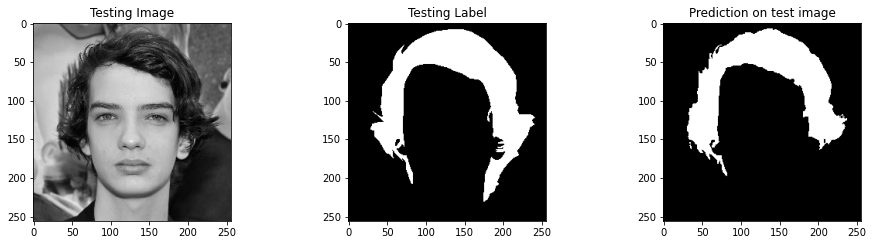

In [ ]:
import random
number_random = random.randint(0, len(masks_test)-1)
threshold = 0.5
test_img = images_test[number_random]
ground_truth=masks_test[number_random]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)


plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()